## Problem Set 2: Linear Regression

#### _Due date: Oct 30, 11:59pm_

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file to your computer (use "Raw" link on gist\github), run Anaconda and choose this file in Anaconda's file explorer. Use the `Python 3` version. Everything that follows assumes that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

If certain output is given for some cells, that means that you are expected to get similar results.

Total: 70 points.

### 1. Numpy Tutorial
**1\.1 [5pt]**
Modify the cell below to return a 5x5 matrix of ones. Put some code there and press `Ctrl+Enter` to execute contents of the cell. You should see something like the output below. [[1]](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.creation.html#arrays-creation) [[2]](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.array-creation.html#routines-array-creation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# raise NotImplementedError("Replace this raise statement with the code "
#                           "that prints 5x5 matrix of ones")

ones = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        ones[i][j] = 1
print(ones)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


**1.2 [5pt]** 
Vectorizing your code is very important to get results in a reasonable time. Let A be a 10x10 matrix and x be a 10-element column vector. Your friend writes the following code. How would you vectorize this code to run without any for loops? Compare execution speed for different values of `n` with [`%timeit`](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit).

In [2]:
n = 10
def compute_something(A, x):
    v = np.zeros((n, 1))
    for i in range(n):
        for j in range(n):
            v[i] += A[i, j] * x[j]
    return v
            
A = np.random.rand(n, n)
x = np.random.rand(n, 1)
print(compute_something(A, x))


print("\nRunning time:")
%timeit compute_something(A,x)

[[3.49529295]
 [2.49793714]
 [2.25118915]
 [2.37640395]
 [3.62833476]
 [2.81438965]
 [3.3089403 ]
 [2.54308638]
 [2.33135935]
 [2.82730649]]

Running time:
296 µs ± 17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [3]:
def vectorized(A, x):
    return np.matmul(A,x)

print(vectorized(A, x))
assert np.max(abs(vectorized(A, x) - compute_something(A, x))) < 1e-3

print("\nRunning time:")
%timeit vectorized(A, x)

[[3.49529295]
 [2.49793714]
 [2.25118915]
 [2.37640395]
 [3.62833476]
 [2.81438965]
 [3.3089403 ]
 [2.54308638]
 [2.33135935]
 [2.82730649]]

Running time:
1.24 µs ± 82.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
for n in [5, 10, 100, 500]:
    A = np.random.rand(n, n)
    x = np.random.rand(n, 1)
    %timeit -n 5 compute_something(A, x)
    %timeit -n 5 vectorized(A, x)
    print('---')

94.1 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
1.48 µs ± 778 ns per loop (mean ± std. dev. of 7 runs, 5 loops each)
---
363 µs ± 69.4 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
1.52 µs ± 790 ns per loop (mean ± std. dev. of 7 runs, 5 loops each)
---
31.2 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
The slowest run took 6.70 times longer than the fastest. This could mean that an intermediate result is being cached.
5.68 µs ± 5.8 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
---
706 ms ± 2.71 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)
The slowest run took 4.06 times longer than the fastest. This could mean that an intermediate result is being cached.
26.3 µs ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
---


### 2. Linear regression with one variable

In this part of the exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. The file ex1data.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

**2.1 [10pt]** Generate a plot similar to the one below
: [[1]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) [[2]](https://matplotlib.org/api/pyplot_api.html?highlight=xlim#matplotlib.pyplot.xlim) [[3]](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20xlabel#matplotlib.pyplot.xlabel)

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.

(97, 1) (97, 1) 97
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]
 [8.3829]
 [7.4764]
 [8.5781]
 [6.4862]
 [5.0546]] 
 [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]
 [11.886 ]
 [ 4.3483]
 [12.    ]
 [ 6.5987]
 [ 3.8166]]


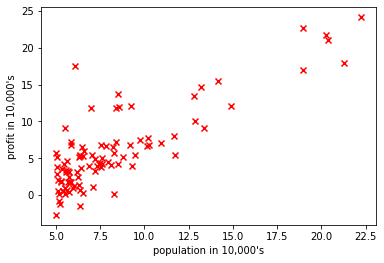

In [5]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
X, y = data[:, 0, np.newaxis], data[:, 1, np.newaxis]
n = data.shape[0]
print(X.shape, y.shape, n)
print(X[:10], '\n', y[:10])

plt.scatter(X, y, marker='x', color='red')
plt.xlabel("population in 10,000's")
plt.ylabel("profit in 10,000's")
plt.axis('auto')
plt.show()

**2.2** Gradient Descent

In this part, you will fit the linear regression parameter $\theta$ to our dataset using gradient descent.

The objective of linear regression is to minimize the cost function
$$ J(\theta) = \frac{1}{2m} \sum_{i = 1}^{m} \big(h(x^{(i)}; \theta) - y^{(i)}\big)^2$$
where the hypothesis $h(x;\theta)$ is given by the linear model ($x'$ has an additional fake feature always equal to '`1`')
$$ h(x;\theta) = \theta^T x' = \theta_0 + \theta_1 x$$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize the cost J(θ). One way to do this is to use the gradient descent. In batch gradient descent algorithm,  value of θ is updated iteratively using the gradient of J(θ).

$$ \theta_j^{(k+1)} = \theta_j^{(k)} - \eta \frac{\partial J(\theta)}{\partial \theta_j} $$
With each step of gradient descent, your parameter $\theta_j$ comes closer to the optimal values
that will achieve the lowest cost J(θ).

**2.2.1** **[5pt]** What is $\eta$? How do we set $\eta$?

$\eta$ is the step size of this gradient descent algorithm, it is used to determine how many units of data each iteration skips between. There are a few ways that a programmer can set $\eta$. For example, we can set $\eta$ as a fixed value, or we can vary it in each iteration using the $\eta$ that minimizes the cost function such as the Cauchy method.

**2.2.2** **[25pt]** Cost Implementation

As you perform gradient descent to learn to minimize the cost function, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.

In the following lines, we add another dimension to our data to accommodate the intercept term and compute the prediction and the loss. As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set. In order to get $x'$ [add a column](https://docs.scipy.org/doc/numpy/reference/generated/numpy.insert.html) of ones to the data matrix `X`.

You should expect to see a cost of approximately 32.

In [6]:
# assertions below are true only for this 
# specific case and are given to ease debugging!

def add_column(X):
    assert len(X.shape) == 2 and X.shape[1] == 1
    size = len(X)
    ones = np.zeros((size, 1))
    for i in range(size):
        ones[i] = 1
    return np.insert(X, [0], ones, axis=1)

def predict(X, theta):
    """ Computes h(x; theta) """
    assert len(X.shape) == 2 and X.shape[1] == 1
    assert theta.shape == (2, 1)
    
    X_prime = add_column(X)
    pred = np.matmul(X_prime, theta)
    
    return pred

def loss(X, y, theta):
    assert X.shape == (n, 1)
    assert y.shape == (n, 1)
    assert theta.shape == (2, 1)
    
    X_prime = add_column(X)
    assert X_prime.shape == (n, 2)
    
    m = len(X)
    loss = 0
    pred = predict(X,theta)
    for i in range(m):
        loss +=(pred[i] - y[i]) ** 2
    
    return float(loss / (2 * m))

theta_init = np.zeros((2, 1))
print(loss(X, y, theta_init))

32.072733877455654


**2.2.3** **[10pt]** GD Implementation

Next, you will implement gradient descent. The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

As you write your code, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost is parameterized by the vector $\theta$ not X and y. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing X or y.

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. Your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.  Another way of making sure your gradient estimate is correct is to check it againts a [finite difference](https://en.wikipedia.org/wiki/Finite_difference) approximation.

We also initialize the parameters to 0. 

max grad comp error 5.912961223764057e-05
estimated theta value [-3.63029144  1.16636235]
resulting loss 4.483388256587726


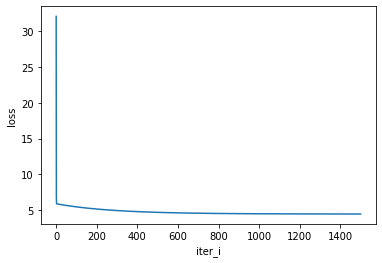

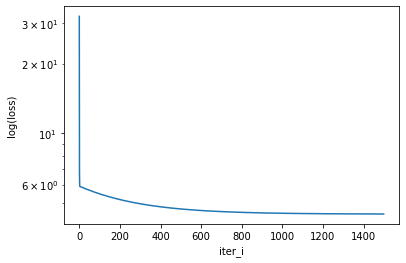

In [7]:
import scipy.optimize
from functools import partial

def loss_gradient(X, y, theta):
    X_prime = add_column(X)
    loss_grad = ((predict(X, theta) - y)*X_prime).mean(axis=0)[:, np.newaxis]
    return loss_grad
    
assert loss_gradient(X, y, theta_init).shape == (2, 1)

def finite_diff_grad_check(f, grad, points, eps=1e-10):
    errs = []
    for point in points:
        point_errs = []
        grad_func_val = grad(point)
        for dim_i in range(point.shape[0]):
            diff_v = np.zeros_like(point)
            diff_v[dim_i] = eps
            dim_grad = (f(point+diff_v) - f(point-diff_v))/(2*eps)
            point_errs.append(abs(dim_grad - grad_func_val[dim_i]))
        errs.append(point_errs)
    return errs

test_points = [np.random.rand(2, 1) for _ in range(10)]
finite_diff_errs = finite_diff_grad_check(
    partial(loss, X, y), partial(loss_gradient, X, y), test_points
)

print('max grad comp error', np.max(finite_diff_errs))
assert np.max(finite_diff_errs) < 1e-3, "grad computation error is too large"

def gradient_descent(X, y, theta, lr = 0.01):
    t0_deriv = 0
    t1_deriv = 0
    m = len(X)
    
    for i in range (m):
        t0_deriv += (theta[0] + theta[1] * X[i]) - y[i]
        t1_deriv += ((theta[0] + theta[1] * X[i]) - y[i])* X[i]
        
    theta_new = theta
    theta_new[1] -= (1/m) * lr * t1_deriv
    theta_new[0] -= (1/m) * lr * t0_deriv
    
#     print(theta_new[0,:])
#     print(theta_new[1,:])
#     print(theta_new)
#     print(str(np.array([theta_new[1,:], theta_new[0,:]])) + "\n")
    
#     theta_new = np.array([theta_new[1,:], theta_new[0,:]])
    
    
    return theta_new


def run_gd(loss, loss_gradient, X, y, theta_init, lr=0.01, n_iter=1500):
    theta_current = theta_init.copy()
    loss_values = []
    theta_values = []
    
    for i in range(n_iter):
        loss_value = loss(X, y, theta_current)
        theta_current = gradient_descent(X, y, theta_current, lr)
        loss_values.append(loss_value)
        theta_values.append(theta_current)
        
    return theta_current, loss_values, theta_values

result = run_gd(loss, loss_gradient, X, y, theta_init)
theta_est, loss_values, theta_values = result

print('estimated theta value', theta_est.ravel())
print('resulting loss', loss(X, y, theta_est))
plt.ylabel('loss')
plt.xlabel('iter_i')
plt.plot(loss_values)
plt.show()

plt.ylabel('log(loss)')
plt.xlabel('iter_i')
plt.semilogy(loss_values)
plt.show()

**2.2.4** **[5pt]** After you are finished, use your final parameters to plot the linear fit. The result should look something like on the figure below. Use the `predict()` function.

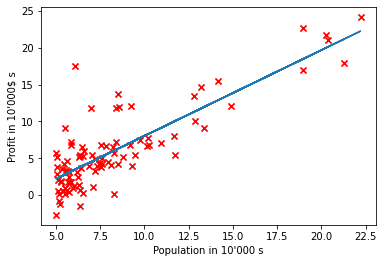

In [8]:
plt.scatter(X, y, marker='x', color='r', alpha=0.5)
x_start, x_end = 5, 25


plt.scatter(X, y, marker='x', color='red')
pred = predict(X, np.array([[-3.63029144],[ 1.16636235]]))
plt.plot(X, pred)
plt.xlabel('Population in 10\'000 s')
plt.ylabel('Profit in 10\'000$ s')
plt.axis('auto')
plt.show()

**2.2.5** **[5pt]** Now use your final values for $\theta$ and the `predict()` function to make predictions on profits in areas of 35,000 and 70,000 people.

In [9]:
#raise NotImplementedError("Predict values given inputs")

def extrapolate(x, t0, t1):
    return t0 + t1*x 

print("Prediction for area of 35,000 people: ")
ans1 = extrapolate(35000, -3.63029144, 1.16636235)
print(str(ans1) + "\n")

print("Prediction for area of 50,000 people: ")
ans2 = extrapolate(50000, -3.63029144, 1.16636235)
print(str(ans2) + "\n")

Prediction for area of 35,000 people: 
40819.05195856

Prediction for area of 50,000 people: 
58314.48720856



To understand the cost function better, you will now plot the cost over a 2-dimensional grid of values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

(100, 100) (100, 100) (100, 100)


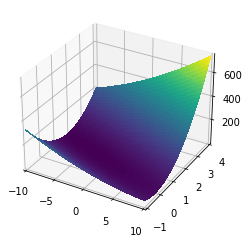

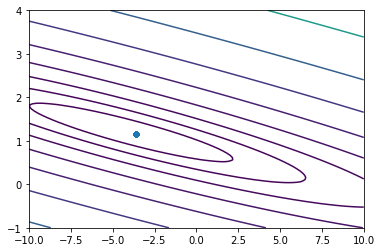

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
limits = [(-10, 10), (-1, 4)]
space = [np.linspace(*limit, 100) for limit in limits]
theta_1_grid, theta_2_grid = np.meshgrid(*space)
theta_meshgrid = np.vstack([theta_1_grid.ravel(), theta_2_grid.ravel()])
loss_test_vals_flat = (((add_column(X) @ theta_meshgrid - y)**2).mean(axis=0)/2)
loss_test_vals_grid = loss_test_vals_flat.reshape(theta_1_grid.shape)
print(theta_1_grid.shape, theta_2_grid.shape, loss_test_vals_grid.shape)

plt.gca(projection='3d').plot_surface(theta_1_grid, theta_2_grid, 
                                      loss_test_vals_grid, cmap=cm.viridis,
                                      linewidth=0, antialiased=False)
xs, ys = np.hstack(theta_values).tolist()
zs = np.array(loss_values)
plt.gca(projection='3d').plot(xs, ys, zs, c='r')
plt.xlim(*limits[0])
plt.ylim(*limits[1])
plt.show()

plt.contour(theta_1_grid, theta_2_grid, loss_test_vals_grid, levels=np.logspace(-2, 3, 20))
plt.plot(xs, ys)
plt.scatter(xs, ys, alpha=0.005)
plt.xlim(*limits[0])
plt.ylim(*limits[1])
plt.show()